In [13]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as pl
from mpl_toolkits.basemap import Basemap
import matplotlib.colors as colors
import pickle
from ocolorutils import MakeParula
from matplotlib.pylab import rcParams
parula = MakeParula()
import os
import seaborn as sb

In [36]:
rcParams['xtick.labelsize'] = 14
rcParams['ytick.labelsize'] = 14

In [98]:
def DrawDists(data,dataU,rngL,rngR,fname,ttlL,ttlR,figsavedir,**kwargs):
    
    if rngL is None:
        rngL = (data.min(),data.max())
    if rngR is None:
        rngR = (data.min(),data.max())
    leftLog = kwargs.pop('leftLog',False)
    rightLog = kwargs.pop('rightLog',False) 
    figsize = kwargs.pop('figsize',(12,6))
    binsL = kwargs.pop('lbins',100)
    binsR = kwargs.pop('rbins',40)
    f,axs=pl.subplots(ncols=2,figsize=figsize)
    ylogL = False
    ylogR = False
    if leftLog:
        binsL = np.logspace(np.log10(rngL[0]),np.log10(rngL[-1]),binsL)
        ylogL = True
    if rightLog:
        ylogR = True
        binsR = np.logspace(np.log10(rngR[0]),np.log10(rngR[-1]),binsR)
    axs[0].hist(data.compressed(),bins=binsL,range=rngL,histtype='stepfilled',
               normed=True,log=ylogL);
    axs[0].set_xlabel(r'$sr^{-1}$',fontsize=16)
    axs[0].set_ylabel(r'$freq.$',fontsize=16)
    axs[0].set_title(ttlL,fontsize=16)
    #axs[0].set_xlim(xmin=-.5,xmax=1)
    axs[1].hist(dataU.compressed(),binsR,range=rngR,log=ylogR
                ,histtype='stepfilled',normed=True)
    axs[1].set_xlabel(r'$sr^{-1}$',fontsize=16)
    axs[1].set_title(ttlR,fontsize=16)
    #axs[1].xaxis.set_ticks(np.arange(0.4,2.2,0.4)*1e-4)
    #axs[1].set_xlim(xmin=0.03,xmax=0.07)
    if leftLog:
        axs[0].set_xscale('log')
    else:
        axs[0].ticklabel_format(axis='both',style='sci',scilimits=(-2,3))
    if rightLog:
        axs[1].set_xscale('log')
    else:
        axs[1].ticklabel_format(axis='both',style='sci',scilimits=(-2,3))
    savepath = os.path.join(figsavedir,fname)
    f.savefig(savepath,dpi=300)
    
def DrawMap(data,label,fname,dataRng,figsavedir,figsz=(6,8),normscale='norm'):
    fig,ax = pl.subplots(figsize=(6,8))
    msn = Basemap(llcrnrlon=lonRng[0],llcrnrlat=latRng[0],
                 urcrnrlon=lonRng[1],urcrnrlat=latRng[1],resolution='h',ax=ax)
    msn.drawmeridians(np.arange(240,280,10),labels=[False]*3+[True])
    msn.drawparallels(np.arange(-30,-10,10),labels=[True]+3*[False])
    msn.drawmapboundary(fill_color='0.3')
    msn.drawcoastlines()
    ssn=pl.cm.ScalarMappable()
    ssn.set_cmap('cubehelix')
    ssn.set_clim(dataRng)
    powerlims = True
    if normscale == 'norm':
        norm = colors.Normalize(vmin=dataRng[0], vmax=dataRng[1])
    elif normscale == 'log':
        norm = colors.LogNorm(vmin=dataRng[0],vmax=dataRng[1])
        powerlims = False
    im = msn.pcolormesh(lons, lats, data, cmap=ssn.cmap,
                        latlon=True, norm=norm)
    cb = msn.colorbar(im);
    cb.set_label(r'$sr^{-1}$',size=16)
    if powerlims:
        cb.formatter.set_powerlimits((-1,3))
        cb.update_ticks()
    ax.set_title(label,fontsize = 18)
    fnpath = os.path.join(figsavedir,fname)
    fig.savefig(fnpath,dpi=300)

In [ ]:
#set the style of the notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("./theme/ocean.css", "r").read()
    return HTML(styles)
css_styling()

In [5]:
%matplotlib inline

In [6]:
maindir='/disk02/UNCERTAINTIES/Monte-Carlo/MODIS/DATA/SouthPacificGyre/2013364210000/L2/'
fnStd = os.path.join(maindir,'Standard/A2013364210000.L2')
figsavedir = os.path.join('/disk02/UNCERTAINTIES/Monte-Carlo/MODIS/','MODISMeeting2016',
                          'Figs','SoPac')

In [105]:
# had to replace variable nflh_unc with nflh_unc_dummy
with nc.Dataset(fnStd) as ds:
    gpNavVar = ds.groups['navigation_data'].variables
    gpGeoVar = ds.groups['geophysical_data'].variables
    lats = gpNavVar['latitude'][:]
    lons = gpNavVar['longitude'][:]
    chlora = gpGeoVar['chlor_a'][:]
    chlra_unc = gpGeoVar['chlor_a_unc'][:]
    nflh = gpGeoVar['nflh'][:]
    nflh_unc = gpGeoVar['nflh_unc_dummy'][:]
    rrs488 = gpGeoVar['Rrs_488'][:]
    rrs488Unc = gpGeoVar['Rrs_unc_488'][:]
    rrs412 = gpGeoVar['Rrs_412'][:]
    rrs412Unc = gpGeoVar['Rrs_unc_412'][:]
    rrs547 = gpGeoVar['Rrs_547'][:]
    rrs547Unc = gpGeoVar['Rrs_unc_547'][:]
    rrs555 = gpGeoVar['Rrs_555'][:]
    rrs555Unc = gpGeoVar['Rrs_unc_555'][:]
    rrs531 = gpGeoVar['Rrs_531'][:]
    rrs531Unc = gpGeoVar['Rrs_unc_531'][:]
    varList=list(gpGeoVar.keys())

In [8]:
lonRng=(lons.min(),lons.max())
latRng=(lats.min(),lats.max())

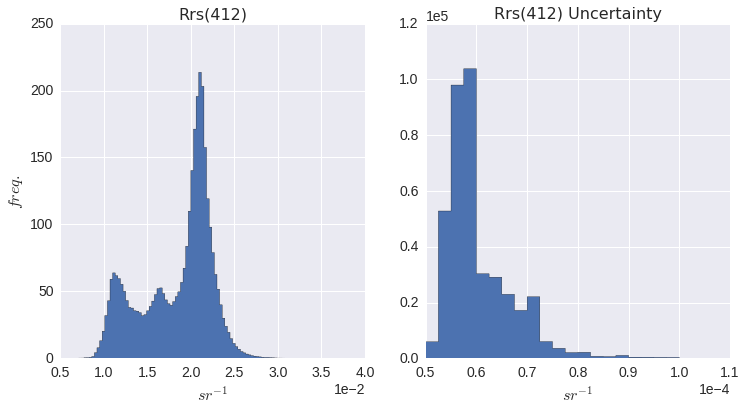

In [101]:
data=rrs412
rngL = (0.5e-2,3.5e-2)
rngR = (5e-5,1e-4)
dataU=rrs412Unc
fname='rrs412dists.png'
ttlL='Rrs(412)'
ttlR='Rrs(412) Uncertainty'
DrawDists(data,dataU,rngL,rngR,fname,ttlL,ttlR,figsavedir,rbins=20)

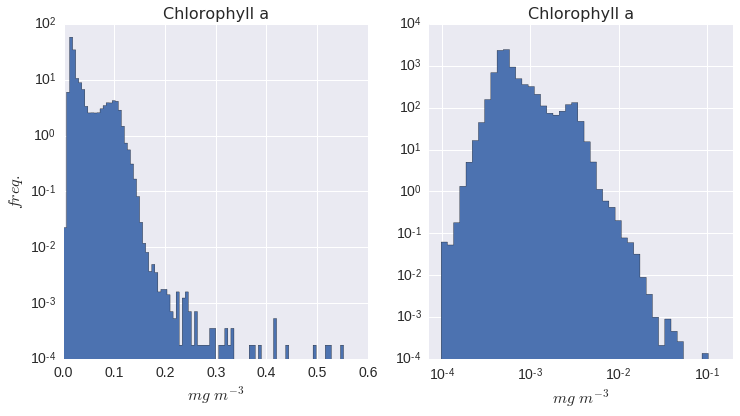

In [37]:
# nflh Dists
data=chlora.compressed()
dataU=chlra_unc.compressed()
fname='chlDists.png'
rcParams['xtick.minor.visible'] = False
f,axs=pl.subplots(ncols=2,figsize=(12,6))
#rng0 = (-.5e-2,5e-2)
rng0 = (0,.6)
axs[0].hist(data,bins=100,range=rng0,histtype='stepfilled',
           normed=True,log=True);
axs[0].set_xlabel(r'$mg \ m^{-3}$',fontsize=16)
axs[0].set_ylabel(r'$freq.$',fontsize=16)
axs[0].set_title('Chlorophyll a',fontsize=16)
axs[0].set_xlim(xmin=rng0[0],xmax=rng0[1])
axs[0].set_yscale('log',nonposy='clip')
#axs[0].spines['top'].set_visible(False)
axs[0].xaxis.set_ticks_position('bottom')
#rng1 =  (4e-5,6e-3)
rng1 =(7e-5,.2)
logbins=np.logspace(np.log10(rng1[0]),np.log10(rng1[1]),50)
axs[1].hist(dataU,bins=logbins,range=rng1
            ,histtype='stepfilled',normed=True,log=True)
axs[1].set_xlabel(r'$mg \ m^{-3}$',fontsize=16)
axs[1].set_title('Chlorophyll a',fontsize=16)
axs[1].xaxis.set_ticks(np.arange(rng1[0],rng1[1],5e-4))
axs[1].set_yscale('log',nonposy='clip')
axs[1].set_xlim(xmin=rng1[0],xmax=rng1[1])
axs[1].xaxis.set_ticks_position('bottom')
axs[1].set_xscale('log')
#for ax in axs: 
    #ax.ticklabel_format(axis='x',style='sci',scilimits=(-2,3))
savepath = os.path.join(figsavedir,fname)
f.savefig(savepath,dpi=300)

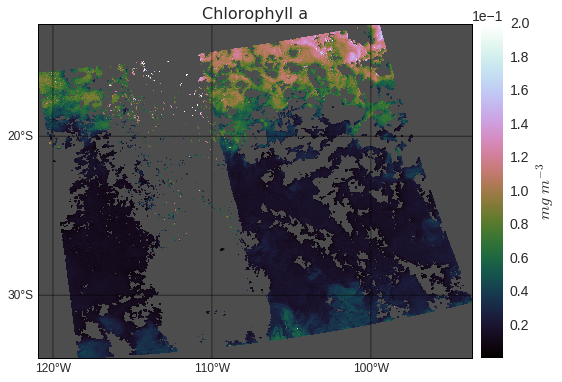

In [53]:
fig,ax = pl.subplots(figsize=(12,6))
data=chlora
label='Chlorophyll a'
fname='Chla.png'
dataRng=(1e-4,0.2)
msn = Basemap(llcrnrlon=lonRng[0],llcrnrlat=latRng[0],
             urcrnrlon=lonRng[1],urcrnrlat=latRng[1],resolution='h',ax=ax)
msn.drawmeridians(np.arange(240,280,10),labels=[False]*3+[True])
msn.drawparallels(np.arange(-30,-10,10),labels=[True]+3*[False])
msn.drawmapboundary(fill_color='0.3')
msn.drawcoastlines()
ssn=pl.cm.ScalarMappable()
ssn.set_cmap('cubehelix')
ssn.set_clim(dataRng)
im = msn.pcolormesh(lons,lats,data,cmap=ssn.cmap,latlon=True,
                         norm=colors.Normalize(vmin=dataRng[0],vmax=dataRng[1]))
cb = msn.colorbar(im);
cb.set_label(r'$mg \ m^{-3}$',size=16)
cb.formatter.set_powerlimits((-1,3))
cb.update_ticks()
ax.set_title(label,fontsize = 16)
fnpath = os.path.join(figsavedir,fname)
fig.savefig(fnpath,dpi=300)

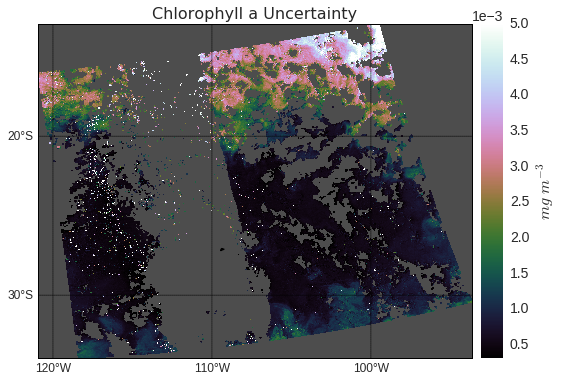

In [54]:
fig,ax = pl.subplots(figsize=(12,6))
data=chlra_unc
label='Chlorophyll a Uncertainty'
fname='ChlaUnc.png'
dataRng=(3e-4,5e-3)
msn = Basemap(llcrnrlon=lonRng[0],llcrnrlat=latRng[0],
             urcrnrlon=lonRng[1],urcrnrlat=latRng[1],resolution='h',ax=ax)
msn.drawmeridians(np.arange(240,280,10),labels=[False]*3+[True])
msn.drawparallels(np.arange(-30,-10,10),labels=[True]+3*[False])
msn.drawmapboundary(fill_color='0.3')
msn.drawcoastlines()
ssn=pl.cm.ScalarMappable()
ssn.set_cmap('cubehelix')
ssn.set_clim(dataRng)
im = msn.pcolormesh(lons,lats,data,cmap=ssn.cmap,latlon=True,
                         norm=colors.Normalize(vmin=dataRng[0],vmax=dataRng[1]))
cb = msn.colorbar(im);
cb.set_label(r'$mg \ m^{-3}$',size=16)
cb.formatter.set_powerlimits((-1,3))
cb.update_ticks()
ax.set_title(label,fontsize = 16)
fnpath = os.path.join(figsavedir,fname)
fig.savefig(fnpath,dpi=300)

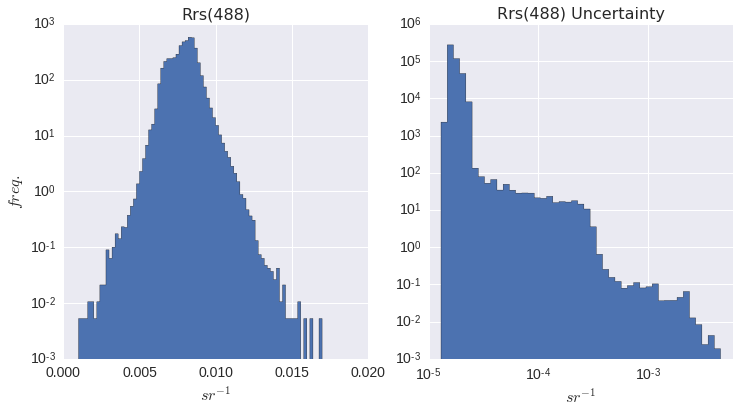

In [95]:
# Rrs 488 Dists
data=rrs488.compressed()
dataU=rrs488Unc.compressed()
rcParams['xtick.minor.visible'] = False
f,axs=pl.subplots(ncols=2,figsize=(12,6))
rng0 = (0,2e-2)
axs[0].hist(data,bins=100,range=rng0,histtype='stepfilled',
           normed=True,log=True);
axs[0].set_xlabel(r'$sr^{-1}$',fontsize=16)
axs[0].set_ylabel(r'$freq.$',fontsize=16)
axs[0].set_title('Rrs(488)',fontsize=16)
axs[0].set_xlim(xmin=rng0[0],xmax=rng0[1])
axs[0].set_yscale('log',nonposy='clip')
#axs[0].spines['top'].set_visible(False)
axs[0].xaxis.set_ticks_position('bottom')
rng1 =  (1e-5,6e-3)
logbins=np.logspace(np.log10(rng1[0]),np.log10(rng1[1]),50)
axs[1].hist(dataU,bins=logbins,range=rng1
            ,histtype='stepfilled',normed=True,log=True)
axs[1].set_xlabel(r'$sr^{-1}$',fontsize=16)
axs[1].set_title('Rrs(488) Uncertainty',fontsize=16)
axs[1].xaxis.set_ticks(np.arange(rng1[0],rng1[1],5e-4))
axs[1].set_yscale('log',nonposy='clip')
axs[1].set_xlim(xmin=rng1[0],xmax=rng1[1])
axs[1].xaxis.set_ticks_position('bottom')
axs[1].set_xscale('log')
#for ax in axs: 
    #ax.ticklabel_format(axis='x',style='sci',scilimits=(-2,3))
savepath = os.path.join(figsavedir,'rrs488dists.png')
f.savefig(savepath,dpi=300)

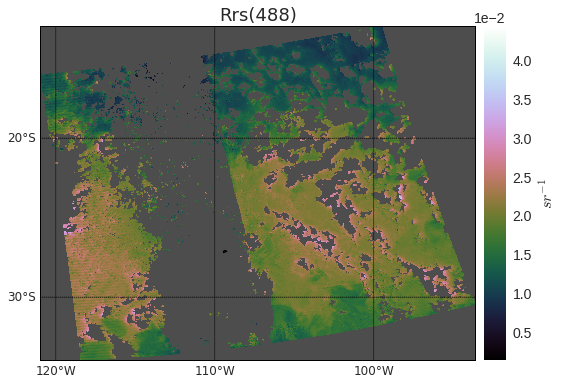

In [146]:
fig,ax = pl.subplots(figsize=(12,6))
data=rrs488
label='Rrs(488)'
fname='Rrs488.png'
dataRng=(data.min(),data.max())
msn = Basemap(llcrnrlon=lonRng[0],llcrnrlat=latRng[0],
             urcrnrlon=lonRng[1],urcrnrlat=latRng[1],resolution='h',ax=ax)
msn.drawmeridians(np.arange(240,280,10),labels=[False]*3+[True])
msn.drawparallels(np.arange(-30,-10,10),labels=[True]+3*[False])
msn.drawmapboundary(fill_color='0.3')
msn.drawcoastlines()
ssn=pl.cm.ScalarMappable()
ssn.set_cmap('cubehelix')
ssn.set_clim(dataRng)
im = msn.pcolormesh(lons,lats,data,cmap=ssn.cmap,latlon=True,
                         norm=colors.Normalize(vmin=dataRng[0],vmax=dataRng[1]))
cb = msn.colorbar(im);
cb.set_label(r'$sr^{-1}$',size=16)
cb.formatter.set_powerlimits((-1,3))
cb.update_ticks()
ax.set_title(label,fontsize = 18)
fnpath = os.path.join(stdMapSaveDir,fname)
fig.savefig(fnpath,dpi=300)

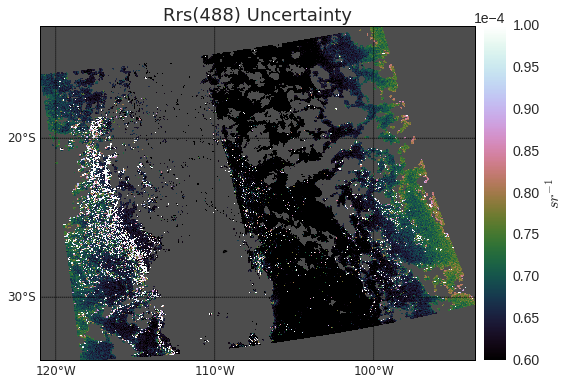

In [149]:
fig,ax = pl.subplots(figsize=(12,6))
data=rrs488Unc
label='Rrs(488) Uncertainty'
fname='Rrs488Unc.png'
dataRng=(6e-5,1e-4)
msn = Basemap(llcrnrlon=lonRng[0],llcrnrlat=latRng[0],
             urcrnrlon=lonRng[1],urcrnrlat=latRng[1],resolution='h',ax=ax)
msn.drawmeridians(np.arange(240,280,10),labels=[False]*3+[True])
msn.drawparallels(np.arange(-30,-10,10),labels=[True]+3*[False])
msn.drawmapboundary(fill_color='0.3')
msn.drawcoastlines()
ssn=pl.cm.ScalarMappable()
ssn.set_cmap('cubehelix')
ssn.set_clim(dataRng)
im = msn.pcolormesh(lons,lats,data,cmap=ssn.cmap,latlon=True,
                         norm=colors.Normalize(vmin=dataRng[0],vmax=dataRng[1]))
cb = msn.colorbar(im);
cb.set_label(r'$sr^{-1}$',size=16)
cb.formatter.set_powerlimits((-1,3))
cb.update_ticks()
ax.set_title(label,fontsize = 18)
fnpath = os.path.join(stdMapSaveDir,fname)
fig.savefig(fnpath,dpi=300)

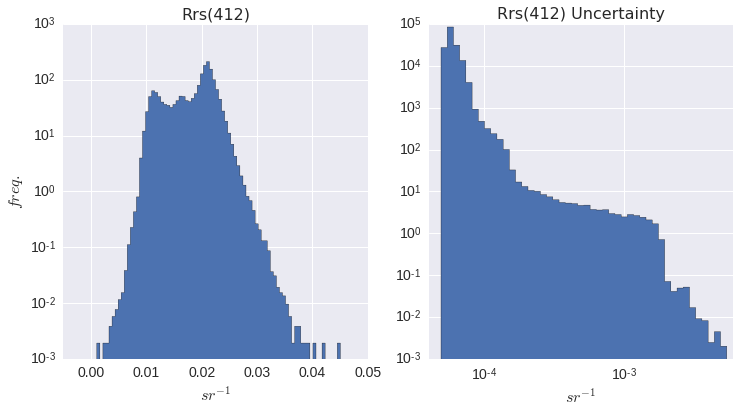

In [39]:
# Rrs 412 Dists
rcParams['xtick.minor.visible'] = False
f,axs=pl.subplots(ncols=2,figsize=(12,6))
rng0 = (-.5e-2,5e-2)
axs[0].hist(rrs412.compressed(),bins=100,range=rng0,histtype='stepfilled',
           normed=True,log=True);
axs[0].set_xlabel(r'$sr^{-1}$',fontsize=16)
axs[0].set_ylabel(r'$freq.$',fontsize=16)
axs[0].set_title('Rrs(412)',fontsize=16)
axs[0].set_xlim(xmin=rng0[0],xmax=rng0[1])
axs[0].set_yscale('log',nonposy='clip')
#axs[0].spines['top'].set_visible(False)
axs[0].xaxis.set_ticks_position('bottom')
rng1 =  (4e-5,6e-3)
logbins=np.logspace(np.log10(rng1[0]),np.log10(rng1[1]),50)
axs[1].hist(rrs412Unc.compressed(),bins=logbins,range=rng1
            ,histtype='stepfilled',normed=True,log=True)
axs[1].set_xlabel(r'$sr^{-1}$',fontsize=16)
axs[1].set_title('Rrs(412) Uncertainty',fontsize=16)
axs[1].xaxis.set_ticks(np.arange(rng1[0],rng1[1],5e-4))
axs[1].set_yscale('log',nonposy='clip')
axs[1].set_xlim(xmin=rng1[0],xmax=rng1[1])
axs[1].xaxis.set_ticks_position('bottom')
axs[1].set_xscale('log')
#for ax in axs: 
    #ax.ticklabel_format(axis='x',style='sci',scilimits=(-2,3))
savepath = os.path.join(figsavedir,'rrs412dists.png')
f.savefig(savepath,dpi=300)

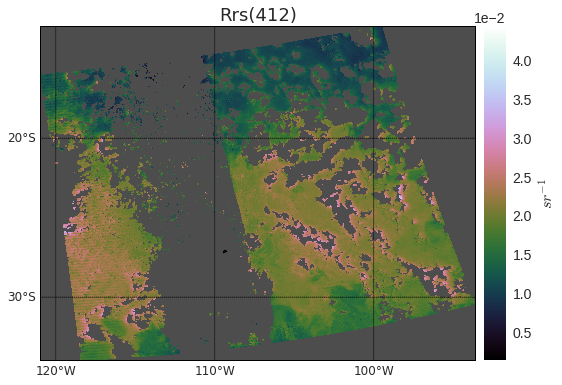

In [139]:
fig,ax = pl.subplots(figsize=(12,6))
data=rrs412
label='Rrs(412)'
fname='Rrs412.png'
dataRng=(data.min(),data.max())
msn = Basemap(llcrnrlon=lonRng[0],llcrnrlat=latRng[0],
             urcrnrlon=lonRng[1],urcrnrlat=latRng[1],resolution='h',ax=ax)
msn.drawmeridians(np.arange(240,280,10),labels=[False]*3+[True])
msn.drawparallels(np.arange(-30,-10,10),labels=[True]+3*[False])
msn.drawmapboundary(fill_color='0.3')
msn.drawcoastlines()
ssn=pl.cm.ScalarMappable()
ssn.set_cmap('cubehelix')
ssn.set_clim(dataRng)
im = msn.pcolormesh(lons,lats,data,cmap=ssn.cmap,latlon=True,
                         norm=colors.Normalize(vmin=dataRng[0],vmax=dataRng[1]))
cb = msn.colorbar(im);
cb.set_label(r'$sr^{-1}$',size=16)
cb.formatter.set_powerlimits((-1,3))
cb.update_ticks()
ax.set_title(label,fontsize = 18)
fnpath = os.path.join(stdMapSaveDir,fname)
fig.savefig(fnpath,dpi=300)

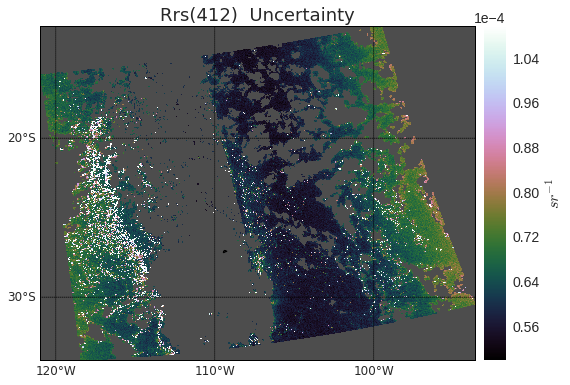

In [143]:
f412U,ax = pl.subplots(figsize=(12,6))
msn = Basemap(llcrnrlon=lonRng[0],llcrnrlat=latRng[0],
             urcrnrlon=lonRng[1],urcrnrlat=latRng[1],resolution='h',ax=ax)
msn.drawmeridians(np.arange(240,280,10),labels=[False]*3+[True])
msn.drawparallels(np.arange(-30,-10,10),labels=[True]+3*[False])
msn.drawmapboundary(fill_color='0.3')
msn.drawcoastlines()
rngRrs412U = (rrs412Unc.min(),1.1e-4)
ssn=pl.cm.ScalarMappable()
ssn.set_cmap('cubehelix')
ssn.set_clim(rngRrs412U)
imRrs412U = msn.pcolormesh(lons,lats,rrs412Unc,cmap=ssn.cmap,latlon=True,
                         norm=colors.Normalize(vmin=rngRrs412U[0],vmax=rngRrs412U[1]))
cbrrs412U = msn.colorbar(imRrs412U);
cbrrs412U.set_label(r'$sr^{-1}$',size=16)
cbrrs412U.formatter.set_powerlimits((-1,3))
cbrrs412U.update_ticks()
ax.set_title('Rrs(412)  Uncertainty',fontsize = 18)
fnRrs412U = os.path.join(stdMapSaveDir,'Rrs412Unc.png')
f412U.savefig(fnRrs412U,dpi=300)

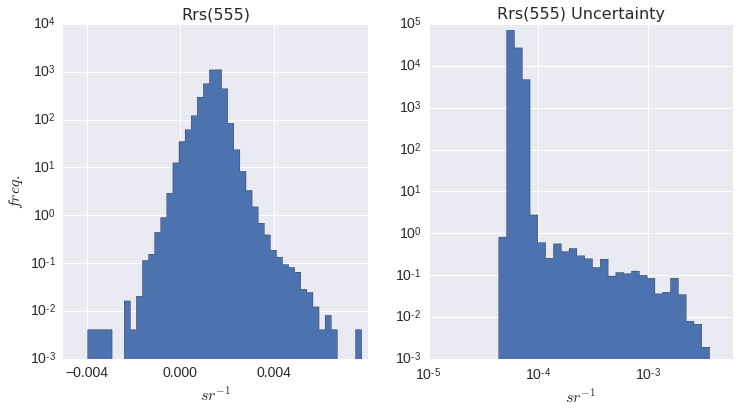

In [51]:
rcParams['xtick.minor.visible'] = False
f,axs=pl.subplots(ncols=2,figsize=(12,6))
rng0 = (-.5e-2,8e-3)
axs[0].hist(rrs555.compressed(),bins=50,range=rng0,histtype='stepfilled',
           normed=True,log=True);
axs[0].set_xlabel(r'$sr^{-1}$',fontsize=16)
axs[0].set_ylabel(r'$freq.$',fontsize=16)
axs[0].set_title('Rrs(555)',fontsize=16)
axs[0].set_xlim(xmin=rng0[0],xmax=rng0[1])
axs[0].set_yscale('log',nonposy='clip')
axs[0].set_xticks(np.arange(-4e-3,rng0[1],4e-3))
#axs[0].spines['top'].set_visible(False)
axs[0].xaxis.set_ticks_position('bottom')
rng1 =  (1e-5,6e-3)
logbins=np.logspace(np.log10(rng1[0]),np.log10(rng1[1]),40)
axs[1].hist(rrs555Unc.compressed(),bins=logbins,range=rng1
            ,histtype='stepfilled',normed=True)
axs[1].set_xlabel(r'$sr^{-1}$',fontsize=16)
axs[1].set_title('Rrs(555) Uncertainty',fontsize=16)
axs[1].xaxis.set_ticks(np.arange(rng1[0],rng1[1],5e-4))
axs[1].set_yscale('log',nonposy='clip')
axs[1].set_xlim(xmin=rng1[0],xmax=rng1[1])
axs[1].xaxis.set_ticks_position('bottom')
axs[1].set_xscale('log')
#for ax in axs: 
    #ax.ticklabel_format(axis='x',style='sci',scilimits=(-2,3))
savepath = os.path.join(figsavedir,'rrs555dists.png')
f.savefig(savepath,dpi=300)

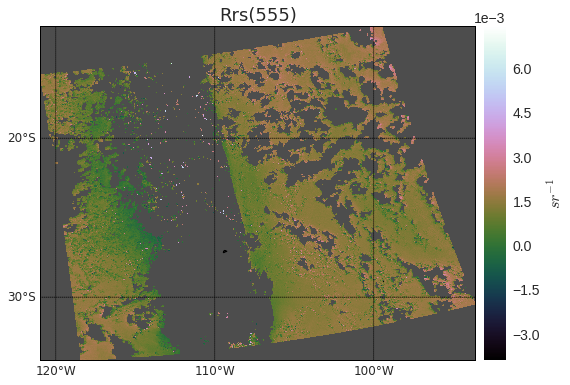

In [151]:
f,ax = pl.subplots(figsize=(12,6))
msn = Basemap(llcrnrlon=lonRng[0],llcrnrlat=latRng[0],
             urcrnrlon=lonRng[1],urcrnrlat=latRng[1],resolution='h',ax=ax)
msn.drawmeridians(np.arange(240,280,10),labels=[False]*3+[True])
msn.drawparallels(np.arange(-30,-10,10),labels=[True]+3*[False])
msn.drawmapboundary(fill_color='0.3')
msn.drawcoastlines()
rngRrs555 = (rrs555.min(),rrs555.max())
ssn=pl.cm.ScalarMappable()
ssn.set_cmap('cubehelix')
ssn.set_clim(rngRrs555)
imRrs555 = msn.pcolormesh(lons,lats,rrs555,cmap=ssn.cmap,latlon=True,
                         norm=colors.Normalize(vmin=rngRrs555[0],vmax=rngRrs555[1]))
cbrrs555 = msn.colorbar(imRrs555);
cbrrs555.set_label(r'$sr^{-1}$',size=16)
cbrrs555.formatter.set_powerlimits((-1,3))
cbrrs555.update_ticks()
ax.set_title('Rrs(555)',fontsize=18)
fnRrs555 = os.path.join(stdMapSaveDir,'Rrs555.png')
f.savefig(fnRrs555,dpi=300)

In [ ]:
colors.

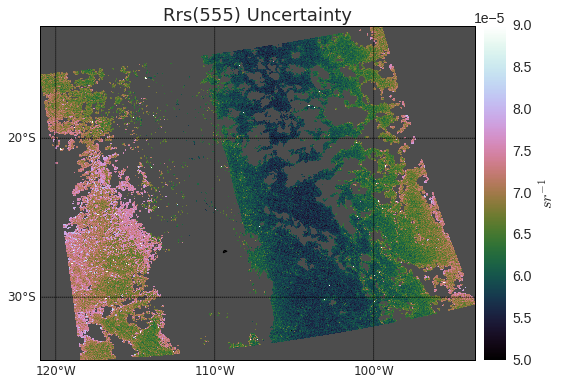

In [150]:
f,ax = pl.subplots(figsize=(12,6))
msn = Basemap(llcrnrlon=lonRng[0],llcrnrlat=latRng[0],
             urcrnrlon=lonRng[1],urcrnrlat=latRng[1],resolution='h',ax=ax)
msn.drawmeridians(np.arange(240,280,10),labels=[False]*3+[True])
msn.drawparallels(np.arange(-30,-10,10),labels=[True]+3*[False])
msn.drawmapboundary(fill_color='0.3')
msn.drawcoastlines()
rngRrs555U = (5e-5,9e-5)
ssn=pl.cm.ScalarMappable()
ssn.set_cmap('cubehelix')
ssn.set_clim(rngRrs555U)
imRrs555U = msn.pcolormesh(lons,lats,rrs555Unc,cmap=ssn.cmap,latlon=True,
                         norm=colors.Normalize(vmin=rngRrs555U[0],vmax=rngRrs555U[1]))
cbrrs555U = msn.colorbar(imRrs555U);
cbrrs555U.set_label(r'$sr^{-1}$',size=16)
cbrrs555U.formatter.set_powerlimits((-1,3))
cbrrs555U.update_ticks()
ax.set_title('Rrs(555) Uncertainty',fontsize=18)
fnRrs555U = os.path.join(stdMapSaveDir,'Rrs555Unc.png')
f.savefig(fnRrs555U,dpi=300)

In [76]:
dataU.min(),data.max()

(8.0019236e-06, 0.0095180012)

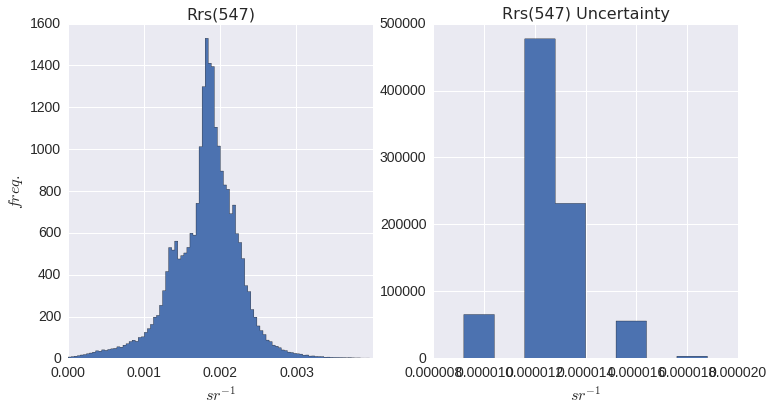

In [93]:
data=rrs547.compressed()
dataU=rrs547Unc.compressed()
rcParams['xtick.minor.visible'] = False
f,axs=pl.subplots(ncols=2,figsize=(12,6))
rng0 = (0,4e-3)
axs[0].hist(data,bins=100,range=rng0,histtype='stepfilled',
           normed=True)#,log=True);
axs[0].set_xlabel(r'$sr^{-1}$',fontsize=16)
axs[0].set_ylabel(r'$freq.$',fontsize=16)
axs[0].set_title('Rrs(547)',fontsize=16)
axs[0].set_xlim(xmin=rng0[0],xmax=rng0[1])
#axs[0].set_yscale('log',nonposy='clip')
#axs[0].spines['top'].set_visible(False)
axs[0].xaxis.set_ticks_position('bottom')
axs[0].set_xticks(np.arange(0,4e-3,1e-3))
rng1 =  (.8e-5,2e-5)
bins=10
#logbins=np.logspace(np.log10(rng1[0]),np.log10(rng1[1]),bins)
axs[1].hist(dataU,bins=bins,range=rng1
            ,histtype='stepfilled',normed=True)#,log=True)
axs[1].set_xlabel(r'$sr^{-1}$',fontsize=16)
axs[1].set_title('Rrs(547) Uncertainty',fontsize=16)
#axs[1].xaxis.set_ticks(np.arange(rng1[0],rng1[1],5e-4))
#axs[1].set_yscale('log',nonposy='clip')
axs[1].set_xlim(xmin=rng1[0],xmax=rng1[1])
axs[1].xaxis.set_ticks_position('bottom')
#axs[1].set_xticks(np.arange(0,4e-3,1e-3))
#axs[1].set_xscale('log')
#for ax in axs: 
    #ax.ticklabel_format(axis='x',style='sci',scilimits=(-2,3))
savepath = os.path.join(figsavedir,'rrs547dists.png')
f.savefig(savepath,dpi=300)

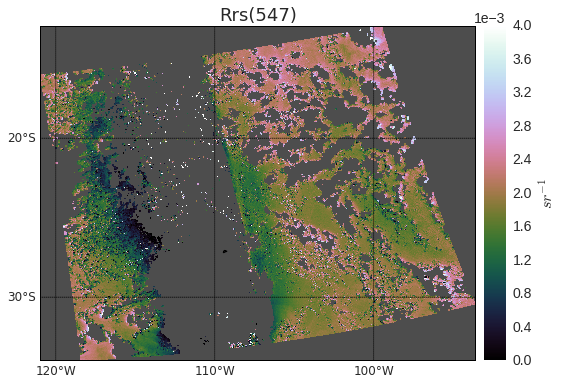

In [160]:
f547,ax = pl.subplots(figsize=(12,6))
msn = Basemap(llcrnrlon=lonRng[0],llcrnrlat=latRng[0],
             urcrnrlon=lonRng[1],urcrnrlat=latRng[1],resolution='h',ax=ax)
msn.drawmeridians(np.arange(240,280,10),labels=[False]*3+[True])
msn.drawparallels(np.arange(-30,-10,10),labels=[True]+3*[False])
msn.drawmapboundary(fill_color='0.3')
msn.drawcoastlines()
rngRrs547 = (0,4e-3)
ssn=pl.cm.ScalarMappable()
ssn.set_cmap('cubehelix')
ssn.set_clim(rngRrs547)
imRrs547 = msn.pcolormesh(lons,lats,rrs547,cmap=ssn.cmap,latlon=True,
                         norm=colors.Normalize(vmin=rngRrs547[0],vmax=rngRrs547[1]))
cbrrs547 = msn.colorbar(imRrs547);
cbrrs547.set_label(r'$sr^{-1}$',size=16)
cbrrs547.formatter.set_powerlimits((-1,3))
cbrrs547.update_ticks()
ax.set_title('Rrs(547)',fontsize = 18)
fnRrs547 = os.path.join(stdMapSaveDir,'Rrs547.png')
f547.savefig(fnRrs547,dpi=300)

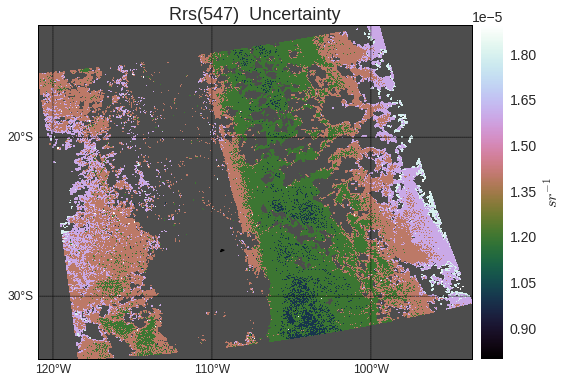

In [91]:
f547U,ax = pl.subplots(figsize=(12,6))
msn = Basemap(llcrnrlon=lonRng[0],llcrnrlat=latRng[0],
             urcrnrlon=lonRng[1],urcrnrlat=latRng[1],resolution='h',ax=ax)
msn.drawmeridians(np.arange(240,280,10),labels=[False]*3+[True])
msn.drawparallels(np.arange(-30,-10,10),labels=[True]+3*[False])
msn.drawmapboundary(fill_color='0.3')
msn.drawcoastlines()
#rngRrs547U = (rrs547Unc.min(),2e-5)#5e-5)
rngRrs547U = (.8e-5,1.9e-5)
ssn=pl.cm.ScalarMappable()
ssn.set_cmap('cubehelix')
ssn.set_clim(rngRrs547U)
imRrs547U = msn.pcolormesh(lons,lats,rrs547Unc,cmap=ssn.cmap,latlon=True,
                         norm=colors.Normalize(vmin=rngRrs547U[0],vmax=rngRrs547U[1]))
cbrrs547U = msn.colorbar(imRrs547U);
cbrrs547U.set_label(r'$sr^{-1}$',size=16)
cbrrs547U.formatter.set_powerlimits((-1,3))
cbrrs547U.update_ticks()
ax.set_title('Rrs(547)  Uncertainty',fontsize = 18)
fnRrs547U = os.path.join(figsavedir,'Rrs547Unc.png')
f547U.savefig(fnRrs547U,dpi=300)

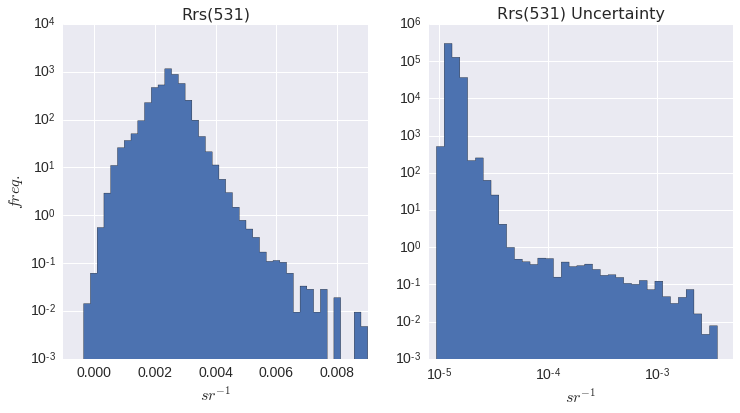

In [130]:
data=rrs531.compressed()
dataU=rrs531Unc.compressed()
rcParams['xtick.minor.visible'] = False
f,axs=pl.subplots(ncols=2,figsize=(12,6))
rng0 = (-.1e-2,.9e-2)
axs[0].hist(data,bins=45,range=rng0,histtype='stepfilled',
           normed=True,log=True);
axs[0].set_xlabel(r'$sr^{-1}$',fontsize=16)
axs[0].set_ylabel(r'$freq.$',fontsize=16)
axs[0].set_title('Rrs(531)',fontsize=16)
axs[0].set_xlim(xmin=rng0[0],xmax=rng0[1])
axs[0].set_yscale('log',nonposy='clip')
#axs[0].spines['top'].set_visible(False)
axs[0].xaxis.set_ticks_position('bottom')
rng1 =  (8e-6,5e-3)
logbins=np.logspace(np.log10(rng1[0]),np.log10(rng1[1]),40)
axs[1].hist(dataU,bins=logbins,range=rng1
            ,histtype='stepfilled',normed=True,log=True)
axs[1].set_xlabel(r'$sr^{-1}$',fontsize=16)
axs[1].set_title('Rrs(531) Uncertainty',fontsize=16)
axs[1].xaxis.set_ticks(np.arange(rng1[0],rng1[1],5e-4))
axs[1].set_yscale('log',nonposy='clip')
axs[1].set_xlim(xmin=rng1[0],xmax=rng1[1])
axs[1].xaxis.set_ticks_position('bottom')
axs[1].set_xscale('log')
#for ax in axs: 
    #ax.ticklabel_format(axis='x',style='sci',scilimits=(-2,3))
savepath = os.path.join(figsavedir,'rrs531dists.png')
f.savefig(savepath,dpi=300)

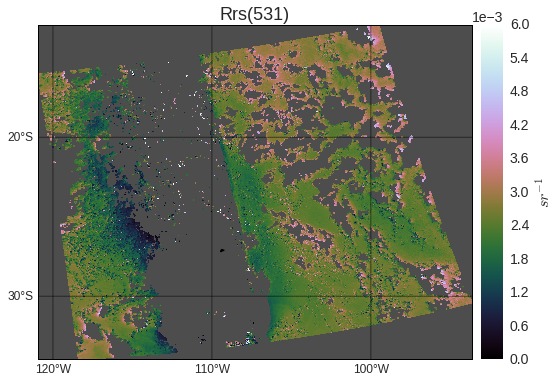

In [132]:
f531,ax = pl.subplots(figsize=(12,6))
msn = Basemap(llcrnrlon=lonRng[0],llcrnrlat=latRng[0],
             urcrnrlon=lonRng[1],urcrnrlat=latRng[1],resolution='h',ax=ax)
msn.drawmeridians(np.arange(240,280,10),labels=[False]*3+[True])
msn.drawparallels(np.arange(-30,-10,10),labels=[True]+3*[False])
msn.drawmapboundary(fill_color='0.3')
msn.drawcoastlines()
rngRrs531 = (0,6e-3)
ssn=pl.cm.ScalarMappable()
ssn.set_cmap('cubehelix')
ssn.set_clim(rngRrs531)
imRrs531 = msn.pcolormesh(lons,lats,rrs531,cmap=ssn.cmap,latlon=True,
                         norm=colors.Normalize(vmin=rngRrs531[0],vmax=rngRrs531[1]))
cbrrs531 = msn.colorbar(imRrs531);
cbrrs531.set_label(r'$sr^{-1}$',size=16)
cbrrs531.formatter.set_powerlimits((-1,3))
cbrrs531.update_ticks()
ax.set_title('Rrs(531)',fontsize = 18)
fnRrs531 = os.path.join(figsavedir,'Rrs531.png')
f531.savefig(fnRrs531,dpi=300)

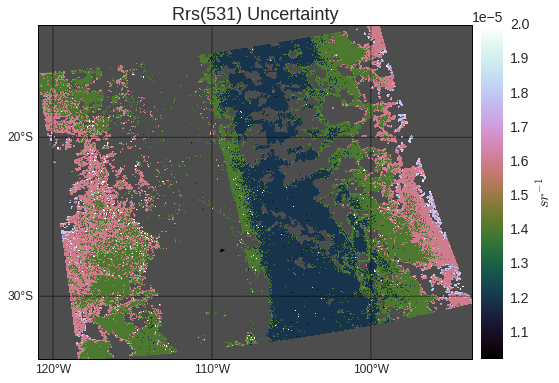

In [118]:
f531,ax = pl.subplots(figsize=(12,6))
msn = Basemap(llcrnrlon=lonRng[0],llcrnrlat=latRng[0],
             urcrnrlon=lonRng[1],urcrnrlat=latRng[1],resolution='h',ax=ax)
msn.drawmeridians(np.arange(240,280,10),labels=[False]*3+[True])
msn.drawparallels(np.arange(-30,-10,10),labels=[True]+3*[False])
msn.drawmapboundary(fill_color='0.3')
msn.drawcoastlines()
rngRrs531U = (1.02e-5,2e-5)
ssn=pl.cm.ScalarMappable()
ssn.set_cmap('cubehelix')
ssn.set_clim(rngRrs531U)
imRrs531 = msn.pcolormesh(lons,lats,rrs531Unc,cmap=ssn.cmap,latlon=True,
                         norm=colors.Normalize(vmin=rngRrs531U[0],vmax=rngRrs531U[1]))
cbrrs531 = msn.colorbar(imRrs531);
cbrrs531.set_label(r'$sr^{-1}$',size=16)
cbrrs531.formatter.set_powerlimits((-1,3))
cbrrs531.update_ticks()
ax.set_title('Rrs(531) Uncertainty',fontsize = 18)
fnRrs531 = os.path.join(figsavedir,'Rrs531Unc.png')
f531.savefig(fnRrs531,dpi=300)

In [ ]:
import matplotlib.gridspec as gridspec
# --- COMPARING nflh unc ACROSS RUN TYPES w/chl <0.3
rng2=(0,2e-4)
figsn = pl.figure(figsize=(12,12))
gs = gridspec.GridSpec(3,2)
ax1 = pl.subplot(gs[:-1,0])
ax2 = pl.subplot(gs[:-1,1])
ax3 = pl.subplot(gs[2,:])
# --- MAP1: w/ NIR ----------
msn = Basemap(llcrnrlon=lonRng[0],llcrnrlat=latRng[0],
            urcrnrlon=lonRng[1],urcrnrlat=latRng[1],resolution='h',ax=ax1)
msn.drawmapboundary(fill_color='0.3')
msn.drawcoastlines()
ssn = pl.cm.ScalarMappable()
ssn.set_cmap(parula)
ssn.set_clim(rng2)
imnflhUncStdchl03 = msn.pcolormesh(lons,lats,nflh_unc_rho_std_chl03,cmap=ssn.cmap,latlon=True,
                          norm=colors.Normalize(vmin=rng2[0],vmax=rng2[1]))
cbsn = msn.colorbar(imnflhUncStdchl03);
cbsn.set_label(r'fluo. unc, w/NIR ($\rho$)',size=16)
cbsn.formatter.set_powerlimits((-1,3))
cbsn.update_ticks()
# --- MAP2: no NIR ---------
msnl = Basemap(llcrnrlon=lonRng[0],llcrnrlat=latRng[0],
            urcrnrlon=lonRng[1],urcrnrlat=latRng[1],resolution='h',ax=ax2)
msnl.drawmapboundary(fill_color='0.3')
msnl.drawcoastlines()
ssnl = pl.cm.ScalarMappable()
ssnl.set_cmap(parula)
ssnl.set_clim(rng2)
imnflhUncNoNirchl03 = msnl.pcolormesh(lons,lats,nflh_unc_rho_nonir_chl03,cmap=ssnl.cmap,latlon=True,
                          norm=colors.Normalize(vmin=rng2[0],vmax=rng2[1]))
cbsnl = msnl.colorbar(imnflhUncNoNirchl03);
cbsnl.set_label(r'fluo. unc, no NIR ($\rho$)',size=16)
cbsnl.formatter.set_powerlimits((-1,3))
cbsnl.update_ticks()
#----- Histograms -------------
l1=np.logspace(np.log10(1e-5),np.log10(1e-3),100)
l2=np.logspace(np.log10(1e-5),np.log10(2e-3),100)
ax3.hist(nflh_unc_rho_nonir_chl03.compressed(),bins=l1,range=(1e-5,1e-3),
         color='orange',histtype='stepfilled',log=True,label='no NIR')
ax3.hist(nflh_unc_rho_std_chl03.compressed(),bins=l2,range=(1e-5,2e-3),
         color='gray',alpha=0.5,histtype='stepfilled',log=True,label='w/ NIR');
ax3.semilogx(basex=10)
ax3.set_xlim(xmax=2e-3)
ax3.legend()

In [ ]:
rngchl=(1e-2,1000)
figchl,axchl = pl.subplots(figsize=(8,12))
mschl = Basemap(llcrnrlon=lonRng[0],llcrnrlat=latRng[0],
            urcrnrlon=lonRng[1],urcrnrlat=latRng[1],resolution='h',ax=axchl)
mschl.drawmapboundary(fill_color='0.3')
mschl.drawcoastlines()
schl = pl.cm.ScalarMappable()
schl.set_cmap(pl.cm.viridis)
schl.set_clim(rng2)
imchl = mschl.pcolormesh(lons,lats,chlora,cmap=schl.cmap,latlon=True,
                          norm=colors.LogNorm(vmin=rngchl[0],vmax=rngchl[1]))
cbchl = mschl.colorbar(imchl);
cbchl.set_label(r'$chlora(mgm^{-3}$)',size=16)
#cbchl.formatter.set_powerlimits((-1,3))
#cbchl.update_ticks()

In [ ]:
figchl.savefig('./fluoResults/chl.png')

In [ ]:
lbchl=np.logspace(np.log10(1e-3),np.log10(30),100)
pl.hist(chlora.compressed(),bins=lbchl,range=(1e-3,30),log=True);
pl.yscale('log')
pl.xscale('log')


In [ ]:
from matplotlib.pylab import rcParams
rcParams['xtick.labelsize']=14
rcParams['ytick.labelsize']=14
fig=pl.figure(figsize=(12,6))
pl.title('')
l1=np.logspace(np.log10(1e-5),np.log10(1e-3),100)
l2=np.logspace(np.log10(1e-5),np.log10(2e-3),100)
pl.hist(nflh_unc_rho_nonir_chl03.compressed(),bins=l1,range=(1e-5,1e-3),normed=True,
         color='orange',histtype='stepfilled',label='no NIR')
pl.hist(nflh_unc_rho_std_chl03.compressed(),bins=l2,range=(1e-5,2e-3),normed=True,
         color='gray',alpha=0.5,histtype='stepfilled',label='w/ NIR');
pl.hist(pnflh_unc_rho_chl03.compressed(),bins=l2,range=(1e-5,2e-3),normed=True,
       color='aqua',alpha=0.7,histtype='stepfilled',label='proxy');
pl.xscale('log')
pl.yscale('log')
pl.xlabel(r'$uncertainty (\rho)$',fontsize=16)
pl.legend()
fig.savefig('nflh_unc_chlmsk.png')
#pl.ticklabel_format(style='sci',axis='x',scilimits=(-1,3))

In [ ]:
#COMPARING STD RUN NFLH_UNC TO NONIR RUN NFLH_UNC
rng2=(1e-5,2e-4)
figsn,axsn = pl.subplots(ncols=2,figsize=(12,12))
msn = Basemap(llcrnrlon=lonRng[0],llcrnrlat=latRng[0],
            urcrnrlon=lonRng[1],urcrnrlat=latRng[1],resolution='h',ax=axsn[0])
msn.drawmapboundary(fill_color='0.3')
msn.drawcoastlines()
ssn = pl.cm.ScalarMappable()
ssn.set_cmap(parula)
ssn.set_clim(rng2)
imnflhUncStd = msn.pcolormesh(lons,lats,nflh_unc_rho_std,cmap=ssn.cmap,latlon=True,
                          norm=colors.Normalize(vmin=rng2[0],vmax=rng2[1]))
cbsn = msn.colorbar(imnflhUncStd);
cbsn.set_label(r'fluo. unc, w/NIR ($\rho$)',size=16)
cbsn.formatter.set_powerlimits((-1,3))
cbsn.update_ticks()
msnl = Basemap(llcrnrlon=lonRng[0],llcrnrlat=latRng[0],
            urcrnrlon=lonRng[1],urcrnrlat=latRng[1],resolution='h',ax=axsn[1])
msnl.drawmapboundary(fill_color='0.3')
msnl.drawcoastlines()
ssnl = pl.cm.ScalarMappable()
ssnl.set_cmap(parula)
ssnl.set_clim(rng2)
imnflhUncNoNir = msnl.pcolormesh(lons,lats,nflh_unc_rho_nonir,cmap=ssnl.cmap,latlon=True,
                          norm=colors.Normalize(vmin=rng2[0],vmax=rng2[1]))
cbsnl = msnl.colorbar(imnflhUncNoNir);
cbsnl.set_label(r'fluo. unc, no NIR ($\rho$)',size=16)
cbsnl.formatter.set_powerlimits((-1,3))
cbsnl.update_ticks()

In [ ]:
f,ax = pl.subplots(figsize=(12,6))
l1=np.logspace(np.log10(1e-5),np.log10(2e-3),100)
l2=np.logspace(np.log10(1e-5),np.log10(2e-3),100)
ax.hist(nflh_unc_rho_nonir.compressed(),bins=l1,range=(1e-5,1e-3),
        color='orange',histtype='stepfilled',log=True,label='no NIR')
ax.hist(nflh_unc_rho_std.compressed(),bins=l2,range=(1e-5,2e-3),color='gray',
        alpha=0.5,histtype='stepfilled',log=True,label = 'w/ NIR');
ax.semilogx(basex=10)
ax.set_xlim(xmax=2e-3)
ax.legend()

In [ ]:
# create fig/axes instance
fontSz=14
rcParams['xtick.labelsize'] = fontSz
rcParams['ytick.labelsize'] = fontSz
fig1,ax = pl.subplots(figsize=(12,12))
#fig,axs = pl.subplots(nrows=2,ncols=2,figsize=(25,22))
# create basemap instance
m1 = Basemap(llcrnrlon=lonRng[0],llcrnrlat=latRng[0],
            urcrnrlon=lonRng[1],urcrnrlat=latRng[1],resolution='h',ax=ax)
rng1=(0,2e-4)
# draw line around projection limb
# color bckgr of map proj. regions.
# missing values over land will show up this color
m1.drawmapboundary(fill_color='0.3')
m1.drawcoastlines()
s1 = pl.cm.ScalarMappable()
s1.set_cmap(parula)
s1.set_clim(rng1)
impnflhUnc = m1.pcolormesh(lons,lats,pnflh_unc_rho,
                        norm=colors.Normalize(vmin=rng1[0],vmax=rng1[1]),
                        cmap=s1.cmap,latlon=True)
cb1 = m1.colorbar(impnflhUnc,"right",size="5%",pad="2%")
cb1.set_label(r'proxy fluo. unc ($\rho$)',size=16)
cb1.formatter.set_powerlimits((-1,3))
cb1.update_ticks()
fig1.savefig('pnflhUnc.png',dpi=300)

In [ ]:
rng1 = (0,2e-4)
fig2,ax2 = pl.subplots(figsize=(12,12))
m2 = Basemap(llcrnrlon=lonRng[0],llcrnrlat=latRng[0],
            urcrnrlon=lonRng[1],urcrnrlat=latRng[1],resolution='h',ax=ax2)
m2.drawmapboundary(fill_color='0.3')
m2.drawcoastlines()
s2 = pl.cm.ScalarMappable()
s2.set_cmap(parula)
s2.set_clim(rng1)
imnflhUnc = m2.pcolormesh(lons,lats,nflh_unc_rho_std,cmap=s2.cmap,latlon=True,
                          norm=colors.Normalize(vmin=rng1[0],vmax=rng1[1]))
cb2 = m2.colorbar(imnflhUnc);
cb2.set_label(r'real fluo. unc ($\rho$)',size=16)
cb2.formatter.set_powerlimits((-1,3))
cb2.update_ticks()
fig2.savefig('nflhUnc.png',dpi=300)

In [ ]:
fig.savefig(savedir+'pnflh.png',dpi=300)

In [ ]:
fluoRng=(0,2e-3)
import matplotlib.ticker as ticker
fig5,ax5 = pl.subplots(figsize=(12,12))
m5 = Basemap(llcrnrlon=lonRng[0],llcrnrlat=latRng[0],
            urcrnrlon=lonRng[1],urcrnrlat=latRng[1],resolution='h',ax=ax5)
m5.drawmapboundary(fill_color='0.3')
m5.drawcoastlines()
s5 = pl.cm.ScalarMappable()
s5.set_cmap(parula)
s5.set_clim(fluoRng)

imnflh = m5.pcolormesh(lons,lats,nflhStd_rho,cmap=s5.cmap,latlon=True,
                          norm=colors.Normalize(vmin=fluoRng[0],vmax=fluoRng[1]))
cb5 = m5.colorbar(imnflh);
cb5.set_label(r'fluorescence ($\rho$)',size=16)
cb5.formatter.set_powerlimits((0,3))
cb5.update_ticks()

fig5.savefig('nflhStd.png',dpi=300)

In [ ]:
fluoRng=(0,2e-3)
import matplotlib.ticker as ticker
fig4,ax4 = pl.subplots(figsize=(12,12))
m2 = Basemap(llcrnrlon=lonRng[0],llcrnrlat=latRng[0],
            urcrnrlon=lonRng[1],urcrnrlat=latRng[1],resolution='h',ax=ax4)
m2.drawmapboundary(fill_color='0.3')
m2.drawcoastlines()
s2 = pl.cm.ScalarMappable()
s2.set_cmap(parula)
s2.set_clim(fluoRng)

imnflh = m2.pcolormesh(lons,lats,nflh_rho,cmap=s2.cmap,latlon=True,
                          norm=colors.Normalize(vmin=fluoRng[0],vmax=fluoRng[1]))
cb4 = m2.colorbar(imnflh);
cb4.set_label(r'fluorescence ($\rho$)',size=16)
cb4.formatter.set_powerlimits((0,3))
cb4.update_ticks()

fig4.savefig('nflh.png',dpi=300)

In [ ]:
flMetPercDiff = 200* (nflh_unc_direct_rho - pnflh_unc_rho)  / (nflh_unc_direct_rho + pnflh_unc_rho)
fig3,ax3 = pl.subplots(figsize=(12,12))
#fig,axs = pl.subplots(nrows=2,ncols=2,figsize=(25,22))
# create basemap instance
m3 = Basemap(llcrnrlon=lonRng[0],llcrnrlat=latRng[0],
            urcrnrlon=lonRng[1],urcrnrlat=latRng[1],resolution='h',ax=ax3)
flPrcDiffRng = (-2e2,1.2e2)

m3.drawmapboundary(fill_color='0.3')
m3.drawcoastlines()
s3 = pl.cm.ScalarMappable()
s3.set_cmap(pl.cm.viridis)
s3.set_clim(flPrcDiffRng)
imFlPrcDif = m3.pcolormesh(lons,lats,flMetPercDiff,
                        norm=colors.Normalize(vmin=flPrcDiffRng[0],vmax=flPrcDiffRng[1]),
                        cmap=s3.cmap,latlon=True)
cb3 = m3.colorbar(imFlPrcDif,"right",size="5%",pad="2%")
cb3.set_label(label='relative difference, (absolute-proxy, %)',size=16)
fig3.savefig('flhreldif.png',dpi=300)

In [ ]:
figP,axP = pl.subplots(ncols=2,figsize=(12,12))
rngP=(-100,100)
mP0 = Basemap(llcrnrlon=lonRng[0],llcrnrlat=latRng[0],
            urcrnrlon=lonRng[1],urcrnrlat=latRng[1],resolution='h',ax=axP[0])
mP0.drawmapboundary(fill_color='0.3')
mP0.drawcoastlines()
sP = pl.cm.ScalarMappable()
sP.set_cmap(parula)
sP.set_clim(rngP)
realPIm = mP0.pcolormesh(lons,lats,nflh_unc_direct_rho/nflh_rho*100,cmap=sP.cmap,
                      norm=colors.Normalize(vmin=rngP[0],vmax=rngP[1]),latlon=True)
cbP0 = mP0.colorbar(realPIm,"right",size='5%',pad='1%')
axP[0].set_title("fluo uncertainty (%)",fontsize=16)
mP1 = Basemap(llcrnrlon=lonRng[0],llcrnrlat=latRng[0],
            urcrnrlon=lonRng[1],urcrnrlat=latRng[1],resolution='h',ax=axP[1])
mP1.drawmapboundary(fill_color='0.3')
mP1.drawcoastlines()
proxPIm = mP1.pcolormesh(lons,lats,pnflh_unc_rho/nflh_rho*100,cmap=sP.cmap,
                       norm=colors.Normalize(vmin=rngP[0],vmax=rngP[1]),latlon=True)
cbP1 = mP1.colorbar(proxPIm,"right",size='5%',pad='1%')
axP[1].set_title("proxy fluo uncertainty (%)",fontsize=16)
#cbfigP=figP.colorbar(proxPIm,ax=axP.ravel().tolist(),aspect=10)

In [ ]:
figP.savefig('RelUnc.png',dpi=300)

In [ ]:
figH,axH = pl.subplots(figsize=(12,8))
rng=(0,7e-3)
axH.ticklabel_format(axis='x',style='sci',scilimits=(1,3))
#axH.set_yscale=('log')
#logBins=np.logspace(np.log10(rng[0]),np.log10(rng[1]),100)
axH.hist(nflh_unc_direct_rho.compressed(),color='orange',label='nflh_unc',
         bins=100,normed=True,histtype='stepfilled',range=rng,log=True);
axH.hist(pnflh_unc_rho.compressed(),color='gray',label='proxy nflh_unc' ,alpha=0.5,
         bins=100,normed=True,histtype='stepfilled',range=rng,log=True);
axH.set_ylim(ymin=7e-3)
axH.legend(fontsize=16)
ax2=figH.add_axes([0.25,0.45,0.4,0.4])
rng2 = (0,1.5e-4)
ax2.hist(nflh_unc_direct_rho.compressed(),color='orange',bins=100,normed=True,
           histtype='stepfilled',range=rng2,log=False)
ax2.hist(pnflh_unc_rho.compressed(),color='gray',bins=100,normed=True,
           histtype='stepfilled',range=rng2,log=False,alpha=0.5)
ax2.set_xlim(rng2)
ax2.ticklabel_format(axis='both',style='sci',scilimits=(1,3))
axH.set_xlabel(r'($\rho$)',fontsize=16)
axH.set_ylabel('frequency',fontsize=16)

In [ ]:
figH.savefig('hists.png',dpi=300)